# Step by Step guide on How to plot p chart.

P chart is a control chart for attribute data(discrete) use to control proportion for nonconforming items in successive subgroups.

*****Example: Assume that control charts are to be established to monitor the non conforming cans of Orange juice in a sample size of 50.****

Since we have a constant sample size, then we can make use of p chart.

In [1]:
#Importing required package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

Let's generate a random sample of 30 observations, we're assuming that the sample size is 50

In [2]:
#creating an empty list
no_of_nonconform = []
#creating an empty list 
sample_num = []
count = 1
for i in range(0,30):
    no_of_nonconform.append(random.randint(2,22))
    sample_num.append(count)
    count+=1
#Creating the dataframe
df = pd.DataFrame({'sample_num' : sample_num,'no_of_nonconform':no_of_nonconform})
df

,sample_num,no_of_nonconform
0,1,4
1,2,19
2,3,19
3,4,17
4,5,14
5,6,3
6,7,22
7,8,19
8,9,16
9,10,18


### Next, is that we need to find the proportion of defective(p)

p= X / n

where:
    X = number of Non Conforming items
    n = sample size
  

In [3]:
#Finding p
for i,a in enumerate(df['no_of_nonconform']):
    df.loc[i,'p'] = a/50
#Displaying the first 5 rows of the dataset
df.head()

,sample_num,no_of_nonconform,p
0,1,4,0.08
1,2,19,0.38
2,3,19,0.38
3,4,17,0.34
4,5,14,0.28


## Next, is to find p_bar.

p_bar = Average of all the p values.

In [4]:
p_bar = df['p'].mean()

## The Control limits for p chart is calculated as follows:

UCL = p_bar + 3sigma

LCL = p_bar - 3sigma

CL = p_bar

where sigma = squareroot(p_bar * q_bar/n)

q = 1 - p_bar

n = sample size

In [5]:
UCL = p_bar + 3* np.sqrt(p_bar * (1-p_bar)/50)
LCL = p_bar - 3* np.sqrt(p_bar * (1-p_bar)/50)
CL = p_bar
print('UCL is:',UCL)
print('LCL is:',LCL)
print('CL is:',CL)

UCL is: 0.43537050349197276
LCL is: 0.06729616317469395
CL is: 0.25133333333333335


### Note: If the value of the LCL is negative, then use 0 as LCL

### Now, we want to plot the sample numbers against the p values.

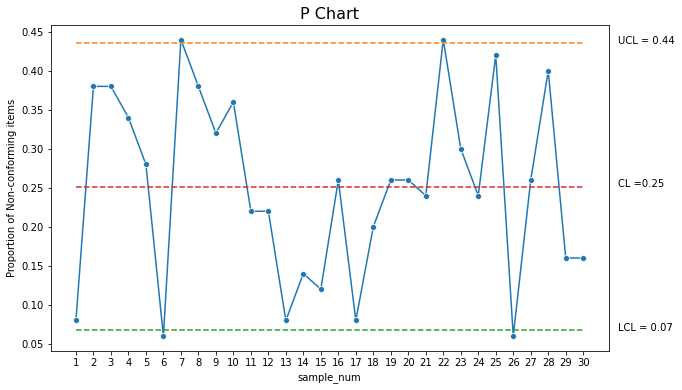

In [6]:
plt.figure(figsize = [10,6])
sns.lineplot(data = df, x = 'sample_num', y = 'p', marker = 'o')
sns.lineplot(data = df, x = 'sample_num', y = UCL,linestyle = 'dashed')
sns.lineplot(data = df, x = 'sample_num', y =  LCL,linestyle = 'dashed')
sns.lineplot(data = df, x = 'sample_num', y = CL,linestyle = 'dashed')
plt.text(df.sample_num.max() + 2,LCL, 'LCL = ' + str(round(LCL,2)))
plt.text(df.sample_num.max() + 2,UCL,'UCL = ' + str(round(UCL,2)))
plt.text(df.sample_num.max() + 2,CL,'CL =' + str(round(CL,2)))
plt.title('P Chart',fontsize = 16);
plt.xticks(range(min(df['sample_num']),max(df['sample_num'])+1));
plt.ylabel('Proportion of Non-conforming items')
plt.show()